<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [ ]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [153]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv('./data/job_listings.csv')

In [154]:
num = 0
for num in range(426):
    soup = BeautifulSoup(df['description'][num], 'html.parser')
    df['description'][num] = soup.get_text()
    df['description'][num] = df['description'][num].lstrip('b')
    df['description'][num] = df['description'][num].replace('\\n', ' ')
    df['description'][num] = df['description'][num].replace('\\xc2\\xa8ve', ' ')
    df['description'][num] = df['description'][num].replace('\xe2\x80\x93', ' ')
    df['description'][num] = df['description'][num].replace('\xe2\x80\x99ll', ' ')
    df['description'][num] = df['description'][num].replace('\xe2\x80\x99re', ' ')

    num = num + 1

In [158]:
df['description'][0]

'"Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

## 2) Use Spacy to tokenize the listings 

In [160]:
##### Your Code Here #####
import spacy
nlp = spacy.load("en_core_web_lg")

In [269]:
STOP_WORDS = nlp.Defaults.stop_words.union(['l','I', 'i', 'it', "it's", 'it.', 'the', 'this', 'skill', ',', '.', '!', '-', ' ', ')','(', '1', 'data', 'place', 'work', '\\ ', '$', '\xe2\x80\x93', '\xe2\x80\x99ll', '\xe2\x80\x99re',])

In [270]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

In [271]:
df['lemmas'] = df['description'].apply(get_lemmas)

In [272]:
df['lemmas']

0      [job, requirement, conceptual, understanding, ...
1      [job, description, scientist, help, build, mac...
2      [scientist, work, consult, business, responsib...
3      [4,969, 6,756, monthcontractunder, general, su...
4      [location, USA, \xe2\x80\x93, multiple, locati...
                             ...                        
421    [want, fantastic, fun, startup, that\xe2\x80\x...
422    [InternshipAt, uber, ignite, opportunity, set,...
423    [200,000, 350,000, yearA, million, people, yea...
424    [senior, scientist, JOB, description, Amplion,...
425    [Cerner, Intelligence, new, innovative, organi...
Name: lemmas, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [273]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)
vect.fit(df['description'])
dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [274]:
print(dtm)

000  10  100  2019  40  abilities  ability  able  academic  access  ...  \
0      0   0    0     0   0          0        2     0         0       0  ...   
1      0   0    0     0   0          0        1     0         0       0  ...   
2      0   0    0     0   0          0        1     0         0       0  ...   
3      0   0    0     0   0          0        0     0         0       0  ...   
4      0   0    0     0   0          0        0     0         0       0  ...   
..   ...  ..  ...   ...  ..        ...      ...   ...       ...     ...  ...   
421    0   0    0     0   2          0        2     0         0       0  ...   
422    0   0    0     1   0          0        0     0         0       0  ...   
423    2   0    0     0   0          0        0     0         0       0  ...   
424    0   0    0     0   0          0        0     2         0       0  ...   
425    1   0    0     0   0          0        0     0         0       0  ...   

     xa6  xae  xb7  xbb  xc2  xe2  xef  year

## 4) Visualize the most common word counts

In [275]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [276]:
doc_len = [len(doc) for doc in df['lemmas']]

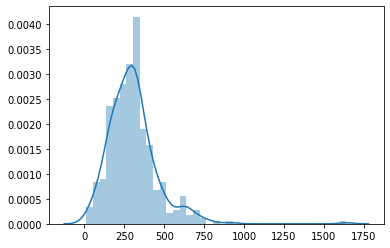

In [277]:
import seaborn as sns
sns.distplot(doc_len);

In [278]:
wc = count(df['lemmas'])

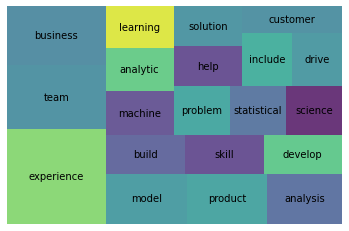

In [279]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [280]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),
                        max_df=.97,
                        min_df=.01,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['description']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,,1,2,3,4,5,6,ability,addition,...,you\'re,you\xe2\x80\x99ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99ve,|
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.076103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.034756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.071252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [282]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [283]:
rndm_tech_article = [ """
Blockchain technology encompasses so much more than just cryptocurrencies these days. And while these currencies are by far blockchain’s most famous use case, the potential for blockchain far, far exceeds a straightforward transfer of value.
The gaming industry, for example, has always been fairly controversial due to a range of issues. Many players feel particularly worried about the protection of their data, fraudulent activities, high fees, and most of all, unfair and hidden odds.
In these cases, P2P doesn’t just mean peer-to-peer; it means player-to-player. As with the other P2P industries that blockchain is disrupting, such as FinTech, there are already plenty of ways in which blockchain technology is being applied to resolve these issues and many more of the challenges faced by the gaming industry. Here are just a few.
Reducing fraud
The gaming industry suffers a lot from online fraud. One of the main advantages of blockchain technology is that it enables highly secure data encryption. What’s more, all of it is entirely accessible and transparent to the player. In other words, blockchain is a for game changer for venues such as online casinos, lotteries, and virtually anything which relies on random number generation.
On top of this, hackers will have particularly hard time, if it is even possible, to destroy a decentralized blockchain network, making sure gamer data stays safe. This is an inherent feature of distributed ledger technology whereby nodes in the ledger maintain the distributed databases in a shared manner, and each node has the complete information in the entire database.
"""]

In [284]:
new = tfidf.transform(rndm_tech_article)

In [285]:
new

<1x6157 sparse matrix of type '<class 'numpy.float64'>'
	with 68 stored elements in Compressed Sparse Row format>

In [286]:
nn.kneighbors(new.todense())

(array([[1.20399879, 1.3341118 , 1.33667292, 1.33667292, 1.34074437]]),
 array([[289, 249, 134, 355, 215]]))

In [287]:
df['description'][289]

"'Blockchain is the world\\'s leading software platform for digital assets. Offering the largest production blockchain platform in the world, we share the passion to code, create, and ultimately build an open, accessible and fair financial future, one piece of software at a time. We are looking to add a Data Scientist | Analyst to our Growth Team as we expand our tens of millions of users in Huobigroup Resposibilities Apply statistical techniques to complex data sets to understand our users across geographies and their engagement across our platforms. Identify, analyze, and interpret trends or patterns and provide ongoing reports and data visualisations, in order to make recommendations to the wider business. Work with internal stakeholders and external business partners to ensure accurate collection and logging of data needed to provide insights on user engagement and help drive business decisions. Analyze performance of marketing campaigns and customer referral programs. Build data p

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 